In [35]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('peanut_data.csv')

In [36]:
baskets = df.basket_id.unique()
products = df['product'].unique()

print(f'{len(baskets)} baskets and {len(products)} products')

684 baskets and 16 products


In [37]:
in_basket = lambda b_id: [0 if df.loc[(df.basket_id == b_id) & (df['product'] == p), 'product'].empty else 1 for p in products]

In [38]:
baskets[3]

'39no city20170331'

In [39]:
in_basket(baskets[3])

[0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [48]:
start = time.time()

purchase_vectors = [in_basket(bid) for bid in baskets]

end = time.time() - start

In [49]:
round(end, 2)

0.96

In [23]:
purchase_vectors = pd.DataFrame(purchase_vectors)

In [30]:
cmat = purchase_vectors.corr()
cmat.shape

(16, 16)

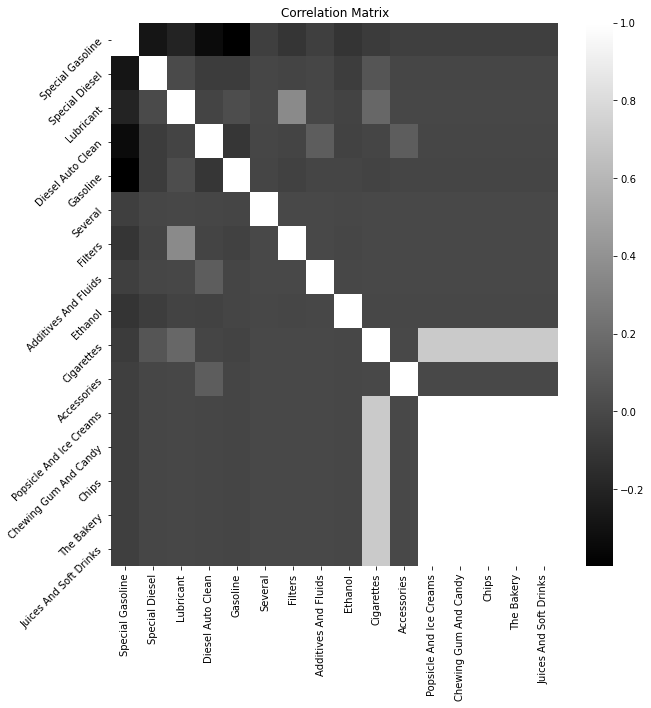

In [31]:
fig, ax = plt.subplots()
sns.heatmap(cmat, ax=ax, xticklabels=products, yticklabels=products, cmap='gray')
ax.set_yticklabels(products, rotation=45)
plt.subplots_adjust()
plt.gcf().set_size_inches(10,10)
plt.title('Correlation Matrix')
plt.show()

In [50]:
power = lambda x: pow(x,2)

In [51]:
power(9)

81

In [52]:
pvec = pd.read_csv('data/purchase_vectors.csv')

In [53]:
pvec.shape

(100000, 40)

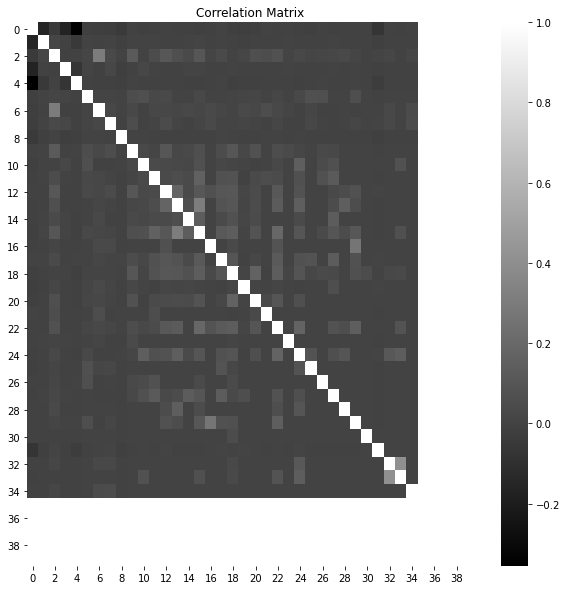

In [56]:
fig, ax = plt.subplots()
sns.heatmap(pvec.corr(), ax=ax, cmap='gray')
plt.subplots_adjust()
plt.gcf().set_size_inches(10,10)
plt.title('Correlation Matrix')
plt.show()